In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from sklearn.cluster import DBSCAN
%matplotlib inline
sns.set()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 数据导入
f_policy = open(r'OxCGRT_latest.csv',encoding="utf-8")
data_policy = pd.read_csv(f_policy)

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 对政策指标的二值化更改
# 封闭措施
# C1
data_policy['C1'] = 0
data_policy['C1'][data_policy['C1_School closing']<=1.0] = 0
data_policy['C1'][data_policy['C1_School closing']>=2.0] = 1
# C2
data_policy['C2'] = 0
data_policy['C2'][data_policy['C2_Workplace closing']<=1.0] = 0
data_policy['C2'][data_policy['C2_Workplace closing']>=2.0] = 1
# C3
data_policy['C3'] = 0
data_policy['C3'][data_policy['C3_Cancel public events']>=1.0] = 1
# C4
data_policy['C4'] = 0
data_policy['C4'][data_policy['C4_Restrictions on gatherings']<=3.0] = 0
data_policy['C4'][data_policy['C4_Restrictions on gatherings']>=4.0] = 1
# C5
data_policy['C5'] = 0
data_policy['C5'][data_policy['C5_Close public transport']<=1.0] = 0
data_policy['C5'][data_policy['C5_Close public transport']>=2.0] = 1
# C6
data_policy['C6'] = 0
data_policy['C6'][data_policy['C6_Stay at home requirements']<=1.0] = 0
data_policy['C6'][data_policy['C6_Stay at home requirements']>=2.0] = 1
# C7
data_policy['C7'] = 0
data_policy['C7'][data_policy['C7_Restrictions on internal movement']<=1.0] = 0
data_policy['C7'][data_policy['C7_Restrictions on internal movement']>=2.0] = 1
# C8
data_policy['C8'] = 0
data_policy['C8'][data_policy['C8_International travel controls']<=1.0] = 0
data_policy['C8'][data_policy['C8_International travel controls']>=2.0] = 1

# 经济政策
# E1
data_policy['E1'] = 0
data_policy['E1'][data_policy['E1_Income support']>=1.0] = 1
# E2
data_policy['E2'] = 0
data_policy['E2'][data_policy['E2_Debt/contract relief']<=1.0] = 0
data_policy['E2'][data_policy['E2_Debt/contract relief']>=2.0] = 1
# E3
data_policy['E3'] = 0
data_policy['E3'][data_policy['E3_Fiscal measures']<1e+07] = 0
data_policy['E3'][data_policy['E3_Fiscal measures']>=1e+07] = 1
# E4
data_policy['E4'] = 0
data_policy['E4'][data_policy['E4_International support']<1e+05] = 0
data_policy['E4'][data_policy['E4_International support']>=1e+05] = 1

# 卫生系统政策
# H1
data_policy['H1'] = 0
data_policy['H1'][data_policy['H1_Public information campaigns']<=1.0] = 0
data_policy['H1'][data_policy['H1_Public information campaigns']>=2.0] = 1
# H2
data_policy['H2'] = 0
data_policy['H2'][data_policy['H2_Testing policy']<=1.0] = 0
data_policy['H2'][data_policy['H2_Testing policy']>=2.0] = 1
# H3
data_policy['H3'] = 0
data_policy['H3'][data_policy['H3_Contact tracing']<=1.0] = 0
data_policy['H3'][data_policy['H3_Contact tracing']>=2.0] = 1
# H4
data_policy['H4'] = 0
data_policy['H4'][data_policy['H4_Emergency investment in healthcare']<1e+06] = 0
data_policy['H4'][data_policy['H4_Emergency investment in healthcare']>=1e+06] = 1
# H5
data_policy['H5'] = 0
data_policy['H5'][data_policy['H5_Investment in vaccines']<1e+06] = 0
data_policy['H5'][data_policy['H5_Investment in vaccines']>=1e+06] = 1
# H6
data_policy['H6'] = 0
data_policy['H6'][data_policy['H6_Facial Coverings']<=2.0] = 0
data_policy['H6'][data_policy['H6_Facial Coverings']>=3.0] = 1
# H7
data_policy['H7'] = 0
data_policy['H7'][data_policy['H7_Vaccination policy']<=3.0] = 0
data_policy['H7'][data_policy['H7_Vaccination policy']>=4.0] = 1

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\zay\AppD

In [4]:
# 建立字典，对应政策代号及其中英文名
dic_policyEng = dict()
dic_policyChi = dict()

# 封闭措施
dic_policyEng['C1'] = 'School closing'
dic_policyChi['C1'] = '关闭学校'
dic_policyEng['C2'] = 'Workplace closing'
dic_policyChi['C2'] = '关闭工作场所'
dic_policyEng['C3'] = 'Cancel public events'
dic_policyChi['C3'] = '取消公共活动'
dic_policyEng['C4'] = 'Restrictions on gatherings'
dic_policyChi['C4'] = '限制集会'
dic_policyEng['C5'] = 'Close public transport'
dic_policyChi['C5'] = '关闭公共交通'
dic_policyEng['C6'] = 'Stay at home requirements'
dic_policyChi['C6'] = '居家要求'
dic_policyEng['C7'] = 'Restrictions on internal movement'
dic_policyChi['C7'] = '国内移动限制'
dic_policyEng['C8'] = 'International travel controls'
dic_policyChi['C8'] = '国际旅行控制'

# 经济政策
dic_policyEng['E1'] = 'Income support'
dic_policyChi['E1'] = '收入支持'
dic_policyEng['E2'] = 'Debt/contract relief'
dic_policyChi['E2'] = '债务/合同放宽'
dic_policyEng['E3'] = 'Fiscal measures'
dic_policyChi['E3'] = '财政措施'
dic_policyEng['E4'] = 'International support'
dic_policyChi['E4'] = '给予国际支持'

# 卫生系统政策
dic_policyEng['H1'] = 'Public information campaigns'
dic_policyChi['H1'] = '公共信息宣传'
dic_policyEng['H2'] = 'Testing policy'
dic_policyChi['H2'] = '检测政策'
dic_policyEng['H3'] = 'Contact tracing'
dic_policyChi['H3'] = '接触者追踪'
dic_policyEng['H4'] = 'Emergency investment in healthcare'
dic_policyChi['H4'] = '医疗保健紧急投资'
dic_policyEng['H5'] = 'Investment in vaccines'
dic_policyChi['H5'] = '疫苗投资'
dic_policyEng['H6'] = 'Facial Coverings'
dic_policyChi['H6'] = '口罩政策'
dic_policyEng['H7'] = 'Vaccination Policy'
dic_policyChi['H7'] = '疫苗接种政策'

In [5]:
# 取国家水平的政策数据、筛选时间
data_policy = data_policy[data_policy['Jurisdiction'] == 'NAT_TOTAL']
data_policy['Date'] = pd.to_datetime(data_policy['Date'],format='%Y%m%d')
data_policy = data_policy[data_policy['Date']<='2020-12-31']

In [6]:
# 政策编号列表
ls_policyCode = (dic_policyEng.keys())

In [7]:
data_policyBrief = pd.DataFrame()
data_policyBrief['CountryName'] = data_policy['CountryName']
# data_policyBrief['Date'] = data_policy['Date']
for code in ls_policyCode:
    data_policyBrief[code] = data_policy[code]

In [8]:
data_policyBrief['C'] = 0
data_policyBrief['E'] = 0
data_policyBrief['H'] = 0
for code in ls_policyCode:
    if code[0] == 'C':
        data_policyBrief['C'] += data_policyBrief[code]
    elif code[0] == 'E':
        data_policyBrief['E'] += data_policyBrief[code]
    elif code[0] == 'H':
        data_policyBrief['H'] += data_policyBrief[code]
for code in ['C','E','H']:
    data_policyBrief[code][data_policyBrief[code]>0] = 1

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if

In [9]:
data_policyCount = data_policyBrief.groupby('CountryName',as_index=False).sum()
data_policyCount

,CountryName,C1,C2,C3,C4,C5,C6,C7,C8,E1,...,H1,H2,H3,H4,H5,H6,H7,C,E,H
0,Afghanistan,203,190,167,135,151,154,128,107,0,...,219,136,18,5,0,181,0,247,1,306
1,Albania,237,288,298,258,115,130,118,181,288,...,297,151,220,2,0,170,0,298,288,298
2,Algeria,237,260,297,180,229,284,209,293,62,...,262,0,187,2,0,223,0,297,263,263
3,Andorra,118,293,294,102,0,0,0,245,294,...,169,258,156,1,0,170,0,294,295,282
4,Angola,283,280,280,157,27,129,241,330,119,...,196,275,0,3,0,266,0,330,134,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Venezuela,291,291,295,233,30,287,274,295,0,...,308,238,0,1,0,287,0,295,285,308
181,Vietnam,192,282,276,66,126,179,184,337,267,...,338,227,300,0,0,45,0,338,269,338
182,Yemen,203,74,118,0,0,94,102,289,0,...,0,0,0,0,0,0,0,292,0,0
183,Zambia,196,244,213,120,0,23,24,228,0,...,315,46,281,1,0,260,0,315,3,315


Text(0.5, 1.0, 'E类政策与H类政策')

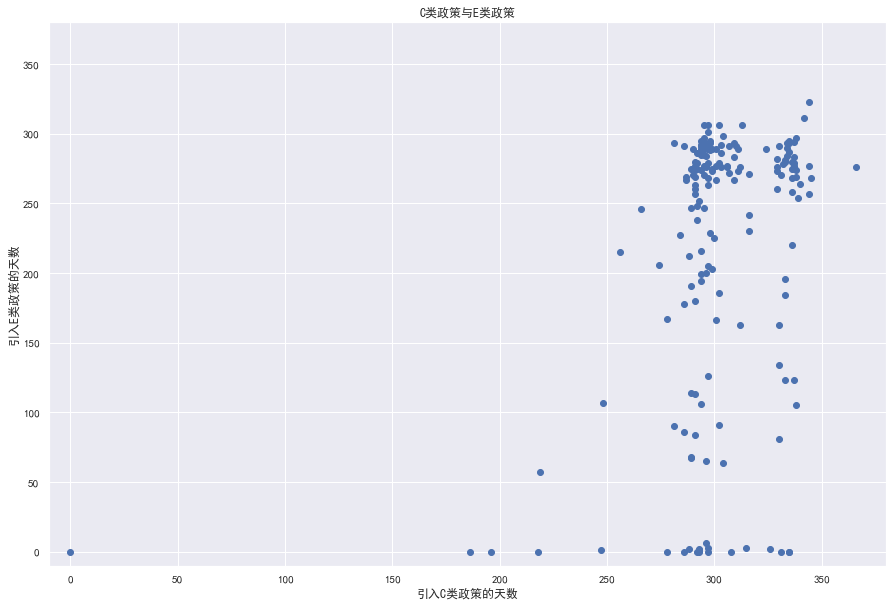

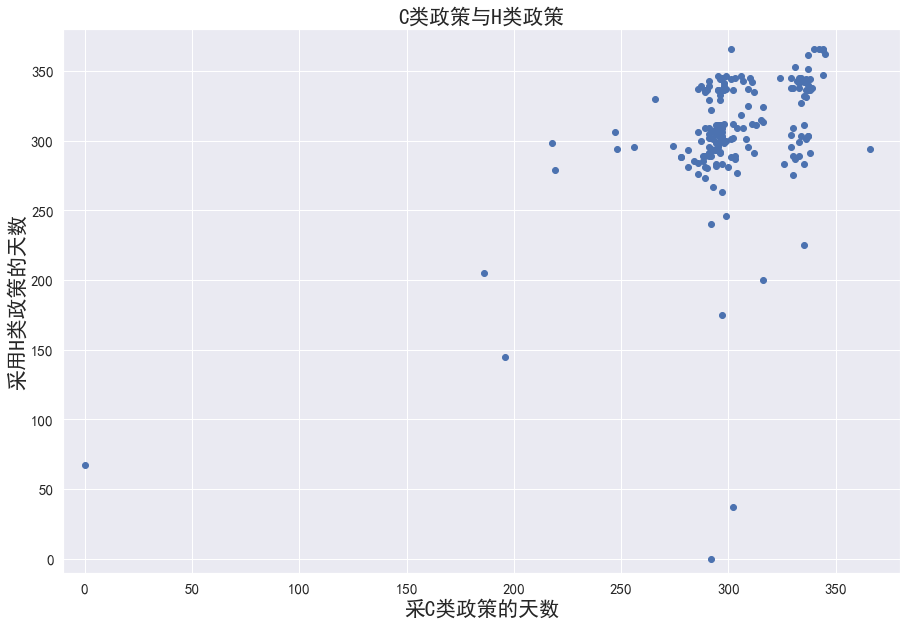

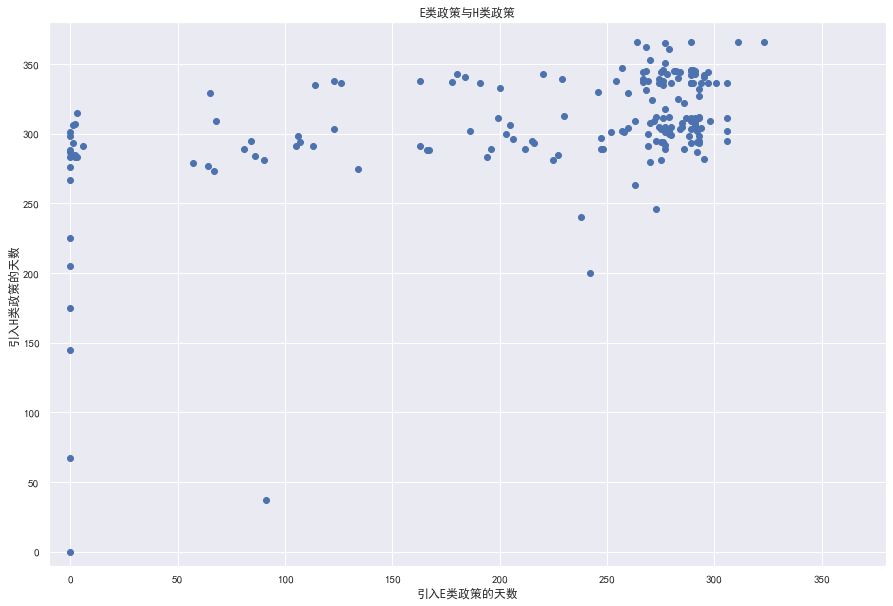

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(data_policyCount['C'],data_policyCount['E'])
plt.xlim(-10,380)
plt.ylim(-10,380)
plt.xlabel('引入C类政策的天数')
plt.ylabel('引入E类政策的天数')
plt.title('C类政策与E类政策')

plt.figure(figsize=(15,10))
plt.scatter(data_policyCount['C'],data_policyCount['H'])
plt.xlim(-10,380)
plt.ylim(-10,380)
plt.tick_params(labelsize=15)
plt.xlabel('采C类政策的天数',fontsize='xx-large')
plt.ylabel('采用H类政策的天数',fontsize='xx-large')
plt.title('C类政策与H类政策',fontsize='xx-large')

plt.figure(figsize=(15,10))
plt.scatter(data_policyCount['E'],data_policyCount['H'])
plt.xlim(-10,380)
plt.ylim(-10,380)
plt.xlabel('引入E类政策的天数')
plt.ylabel('引入H类政策的天数')
plt.title('E类政策与H类政策')

In [11]:
# 政策引入天数与GDP增长率
# 数据导入
f_economy = open(r'所选国家CPI和GDP增长率.csv',encoding='utf-8_sig')
data_economy = pd.read_csv(f_economy)

In [12]:
data_GDP = pd.DataFrame()
data_GDP['国家中文名'] = data_economy['国家中文名']
data_GDP['国家英文名'] = data_economy['国家英文名']
data_GDP['第二季度'] = data_economy['第二季度']
data_GDP = data_GDP.dropna()
data_GDP

,国家中文名,国家英文名,第二季度
0,印度,India,-25.2
1,伊朗,Iran,-2.8
4,沙特阿拉伯,Saudi Arabia,-5.2
5,土耳其,Turkey,-10.8
7,中国,China,11.6
8,日本,Japan,-8.3
9,韩国,South Korea,-3.2
10,俄罗斯,Russia,-3.2
11,西班牙,Spain,-17.9
12,法国,France,-13.8


In [13]:
data_scatter = pd.DataFrame()
data_scatter['CountryName'] = data_policyCount['CountryName']
data_scatter['C'] = data_policyCount['C']
data_scatter['H'] = data_policyCount['H']

In [14]:
subdata1 = pd.DataFrame()
subdata2 = pd.DataFrame()
for country in list(data_GDP['国家英文名']):
    if country in ['China','Japan','South Korea']:
        subdata2 = subdata2.append(data_scatter[data_scatter['CountryName']==country])
    else:
        subdata1 = subdata1.append(data_scatter[data_scatter['CountryName']==country])

In [15]:
subdata3 = pd.DataFrame()
for country in ['United States','France','Brazil','Canada,'Mexico','Italy','Russia']:
    subdata3 = subdata3.append(data_scatter[data_scatter['CountryName']==country])
subdata3

,CountryName,C,H
175,United States,334,303
60,France,307,343
23,Brazil,295,305
30,Canada,295,298
109,Mexico,286,284
83,Italy,337,336
137,Russia,337,303


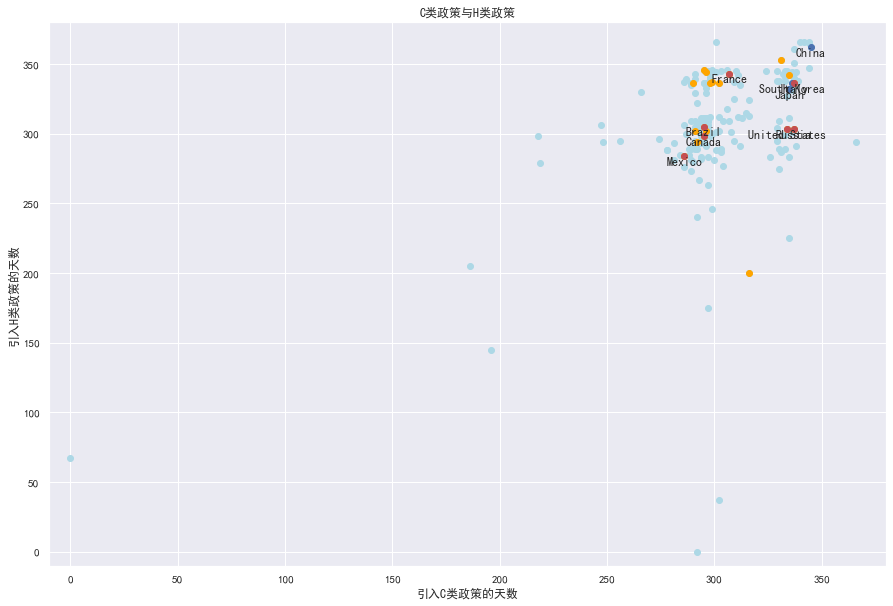

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(data_policyCount['C'],data_policyCount['H'],c='lightblue')
plt.xlim(-10,380)
plt.ylim(-10,380)
plt.xlabel('引入C类政策的天数')
plt.ylabel('引入H类政策的天数')
plt.title('C类政策与H类政策')

plt.scatter(subdata1['C'],subdata1['H'],c='orange')
plt.scatter(subdata2['C'],subdata2['H'],c='b')
plt.scatter(subdata3['C'],subdata3['H'],c='r')
for i in range(subdata3.shape[0]):
    plt.text(subdata3['C'].iloc[i],subdata3['H'].iloc[i],subdata3['CountryName'].iloc[i],verticalalignment='top',horizontalalignment='center')
for i in range(subdata2.shape[0]):
    plt.text(subdata2['C'].iloc[i],subdata2['H'].iloc[i],subdata2['CountryName'].iloc[i],verticalalignment='top',horizontalalignment='center')

In [17]:
f_clusterResult = open(r'cluster results.csv',encoding="utf-8")
data_clusterResult = pd.read_csv(f_clusterResult)

In [18]:
# 修改标号
ls_mainIndex = []
ls_isolateIndex = []
data_valueCount = data_clusterResult['class'].value_counts()
for index in data_valueCount.index:
    if data_valueCount[index] <= 2:
        ls_isolateIndex.append(index)
    else:
        ls_mainIndex.append(index)
data_clusterResult['classIndex'] = 0
newclass = ['甲','乙','丙','丁']
for i in ls_isolateIndex:
    data_clusterResult['classIndex'][data_clusterResult['class']==i] = -1
    data_clusterResult['class'][data_clusterResult['class']==i] = '孤立点'
for i in range(4):
    Class = ls_mainIndex[i]
    data_clusterResult['classIndex'][data_clusterResult['class']==Class] = i
    data_clusterResult['class'][data_clusterResult['class']==Class] = newclass[i]
data_clusterResult

C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\zay\

,CountryName,C,H,class,classIndex
0,Afghanistan,247,306,孤立点,-1
1,Albania,298,298,甲,0
2,Algeria,297,263,甲,0
3,Andorra,294,282,甲,0
4,Angola,330,275,丁,3
...,...,...,...,...,...
180,Venezuela,295,308,甲,0
181,Vietnam,338,338,丙,2
182,Yemen,292,0,孤立点,-1
183,Zambia,315,315,甲,0


C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\zay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

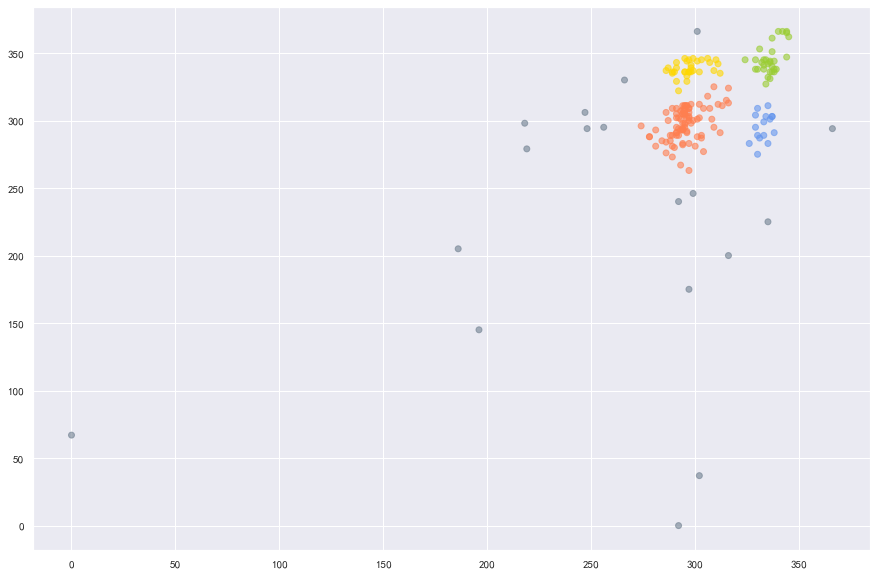

In [19]:
data_clusterResult['color'] = 0
ls_color = ['slategrey','coral','gold','yellowgreen','cornflowerblue']
for i in range(-1,4):
    data_clusterResult['color'][data_clusterResult['classIndex']==i] = ls_color[i+1]

plt.figure(figsize=(15,10))
plt.scatter(data_policyCount['C'],data_policyCount['H'],c=list(data_clusterResult['color']),alpha=0.6)

In [20]:
data_clusterResult.to_csv('国家聚类_凸聚类.csv',index=False,sep=',',encoding="utf_8_sig")

In [21]:
subdata1 = pd.DataFrame()
subdata2 = pd.DataFrame()
for country in list(data_GDP['国家英文名']):
    if country in ['China','Japan','South Korea']:
        subdata2 = subdata2.append(data_clusterResult[data_clusterResult['CountryName']==country])
    else:
        subdata1 = subdata1.append(data_clusterResult[data_clusterResult['CountryName']==country])

subdata3 = pd.DataFrame()
for country in ['United States','France','Brazil','Canada','Mexico','Italy','Russia']:
    subdata3 = subdata3.append(data_clusterResult[data_clusterResult['CountryName']==country])

In [22]:
# 翻译国家名
f_R0 = open(r'各国R0.csv',encoding = "utf-8")
data_R0 = pd.read_csv(f_R0)

data_names = data_R0[['国家中文名','国家英文名']]
data_names = data_names.drop_duplicates()

# 国家名翻译 查找异常项
ls_countryEng = list(data_names['国家英文名'])
for country in data_scatter['CountryName']:
    if country not in ls_countryEng:
        print(country)

# 国家名翻译字典
dic_names = {}
for i in range(data_names.shape[0]):
    countryEng = data_names['国家英文名'].iloc[i]
    countryChi = data_names['国家中文名'].iloc[i]
    dic_names[countryEng] = countryChi

Aruba
Bermuda
Cape Verde
Congo
Czech Republic
Democratic Republic of Congo
Faeroe Islands
Greenland
Guam
Hong Kong
Kiribati
Kyrgyz Republic
Macao
Myanmar
Palestine
Puerto Rico
Slovak Republic
South Korea
Taiwan
Tonga
Turkmenistan
United States
United States Virgin Islands


In [23]:
ls_countryEngPlus = ['Aruba','Congo','Democratic Republic of Congo','Hong Kong','Macao','Slovak Republic','South Korea','United States','Turkmenistan']
ls_countryChiPlus = ['阿鲁巴','刚果（布）','刚果（金）','香港','澳门','斯洛伐克共和国','韩国','美国','土库曼斯坦']
for i in range(len(ls_countryEngPlus)):
    dic_names[ls_countryEngPlus[i]] = ls_countryChiPlus[i]

6

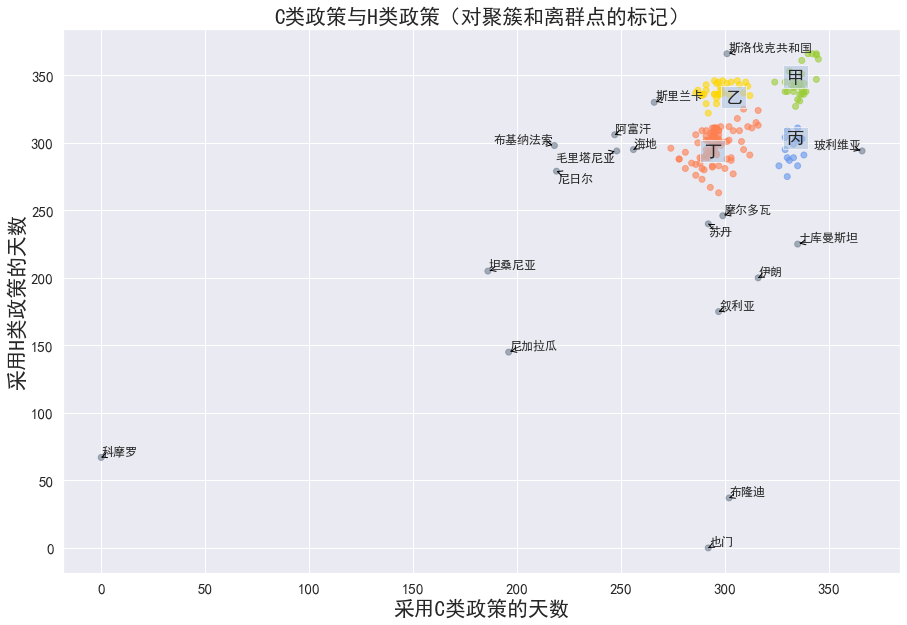

In [35]:
subdata_isolate = data_clusterResult[data_clusterResult['classIndex']==-1]

plt.figure(figsize=(15,10))

texts = []
plt.scatter(data_policyCount['C'],data_policyCount['H'],c=list(data_clusterResult['color']),alpha=0.6)
for i in range(subdata_isolate.shape[0]):
    country = subdata_isolate['CountryName'].iloc[i]
    countryEng = dic_names[country]
    texts.append(plt.text(subdata_isolate['C'].iloc[i],subdata_isolate['H'].iloc[i],countryEng,verticalalignment='top',horizontalalignment='center'))
plt.text(330,345,'甲',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.text(300,330,'乙',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.text(330,300,'丙',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.text(290,290,'丁',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.tick_params(labelsize=15)
plt.xlabel('采用C类政策的天数',fontsize='xx-large')
plt.ylabel('采用H类政策的天数',fontsize='xx-large')
plt.title('C类政策与H类政策（对聚簇和离群点的标记）',fontsize='xx-large')
adjust_text(texts,arrowprops=dict(arrowstyle='->',lw= 1,color='black'))

Text(0.5, 1.0, 'C类政策与H类政策 主要簇')

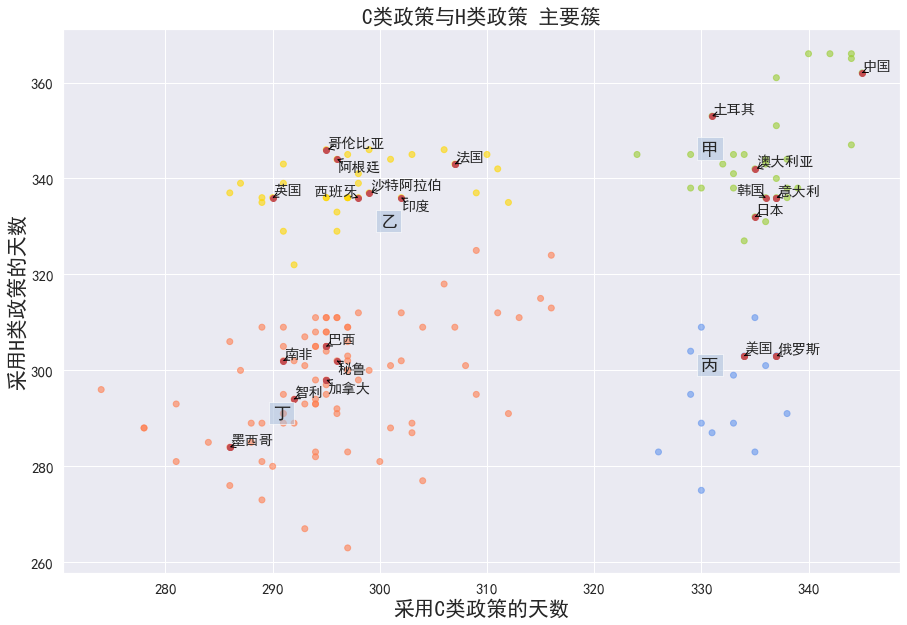

In [33]:
data_main = data_clusterResult[data_clusterResult['classIndex']!=-1]

plt.figure(figsize=(15,10))
plt.scatter(data_main['C'],data_main['H'],c=list(data_main['color']),alpha=0.6)

subdata1 = subdata1[subdata1['classIndex']!=-1]
subdata2 = subdata2[subdata2['classIndex']!=-1]
subdata3 = subdata3[subdata3['classIndex']!=-1]

plt.scatter(subdata1['C'],subdata1['H'],c='r')
plt.scatter(subdata2['C'],subdata2['H'],c='r')
plt.scatter(subdata3['C'],subdata3['H'],c='r')
texts = []
for i in range(subdata1.shape[0]):
    country = subdata1['CountryName'].iloc[i]
    countryEng = dic_names[country]
    texts.append(plt.text(subdata1['C'].iloc[i],subdata1['H'].iloc[i],countryEng,verticalalignment='top',horizontalalignment='center',fontsize='large'))
for i in range(subdata2.shape[0]):
    country = subdata2['CountryName'].iloc[i]
    countryEng = dic_names[country]
    texts.append(plt.text(subdata2['C'].iloc[i],subdata2['H'].iloc[i],countryEng,verticalalignment='top',horizontalalignment='center',fontsize='large'))
'''for i in range(subdata3.shape[0]):
    country = subdata3['CountryName'].iloc[i]
    countryEng = dic_names[country]
    texts.append(plt.text(subdata3['C'].iloc[i],subdata3['H'].iloc[i],countryEng,verticalalignment='top',horizontalalignment='center',fontsize='large'))'''

adjust_text(texts,arrowprops=dict(arrowstyle='->',lw= 1,color='black'))

plt.text(330,345,'甲',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.text(300,330,'乙',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.text(330,300,'丙',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.text(290,290,'丁',fontsize='x-large',weight=2,bbox=dict(facecolor='lightsteelblue', alpha=0.6))
plt.tick_params(labelsize=15)
plt.xlabel('采用C类政策的天数',fontsize='xx-large')
plt.ylabel('采用H类政策的天数',fontsize='xx-large')
plt.title('C类政策与H类政策 主要簇',fontsize='xx-large')